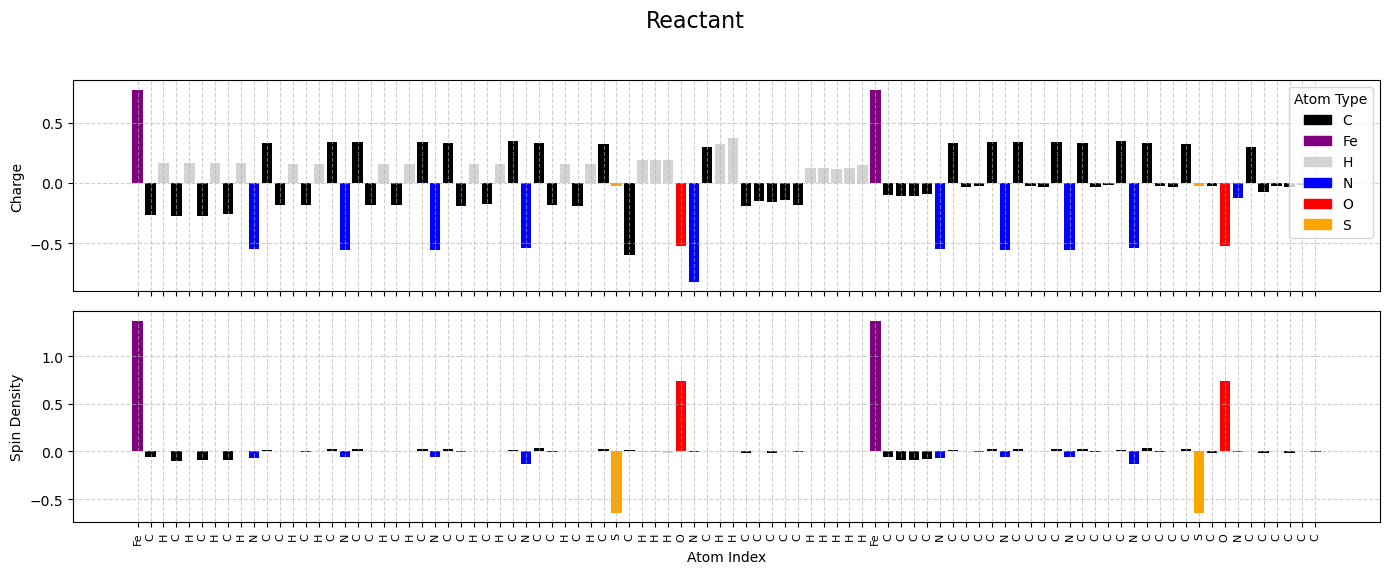

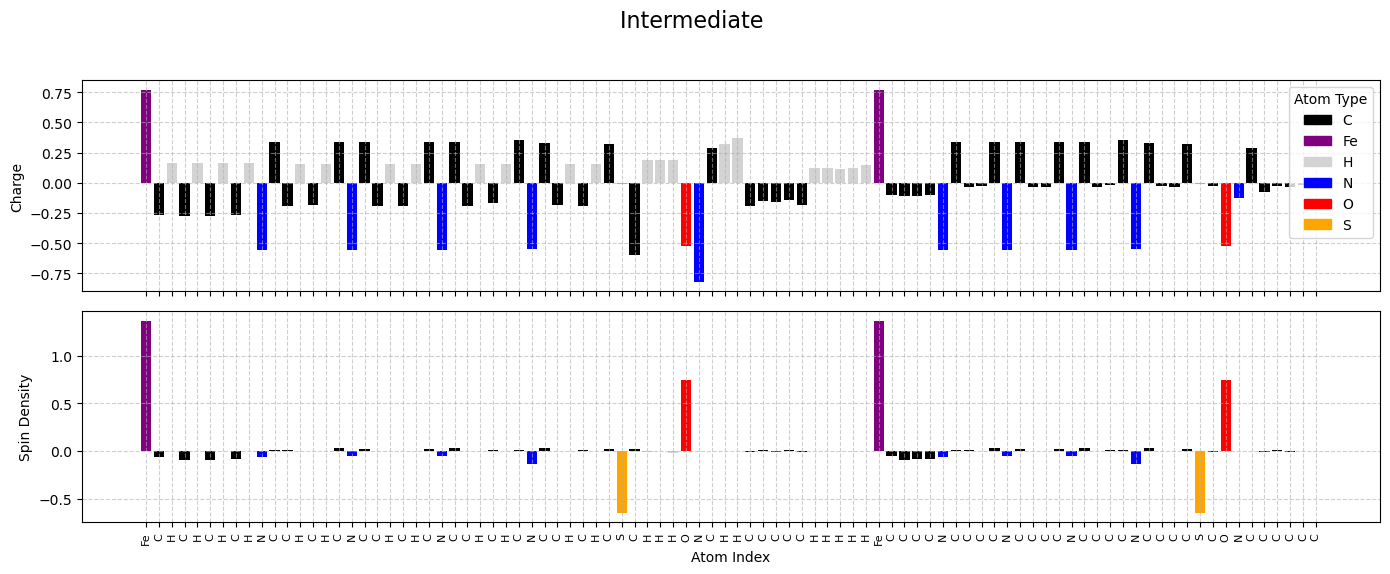

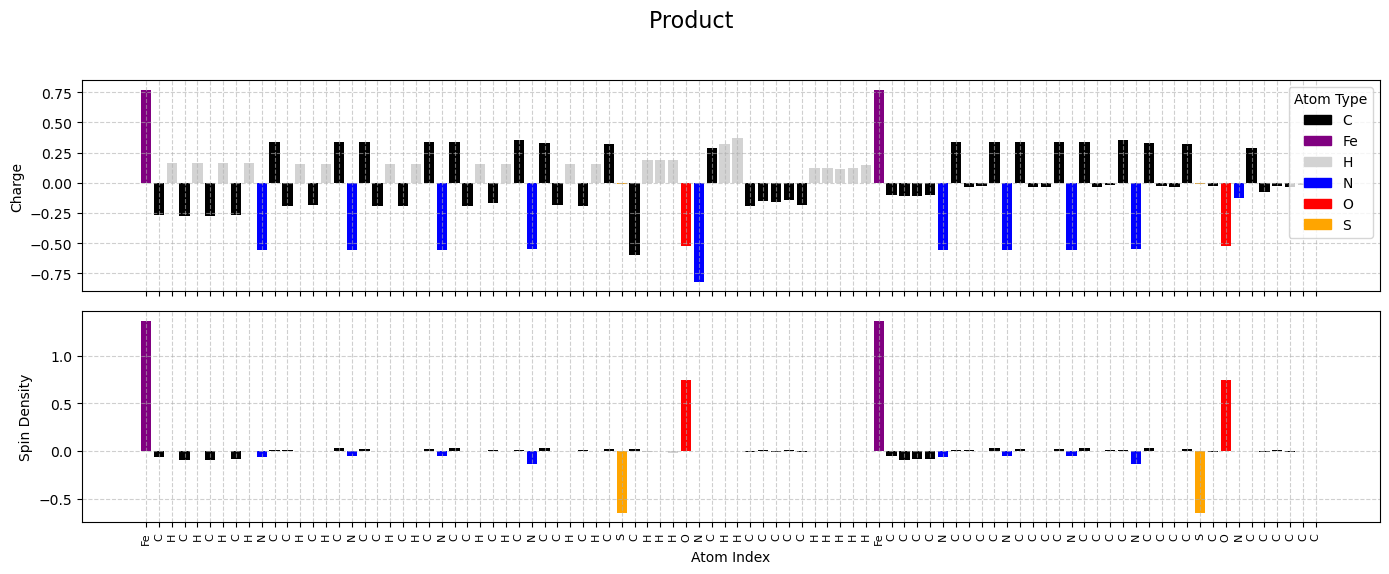

In [1]:
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# File path
file_path = '/home/Shabana/6780/Files/OtherFiles/out_put_file.out'

# Regex pattern
pattern = r'^\s*(\d+)\s+([A-Za-z]+)\s+([-+]?\d*\.\d+|\d+)\s+([-+]?\d*\.\d+|\d+)\s*$'

# Containers
atom_indexs = []
atom_names = []
charges = []
spin_densities = []

# Read and parse
with open(file_path, 'r') as file:
    for line in file:
        match = re.match(pattern, line.strip())
        if match:
            atom_indexs.append(int(match.group(1)))
            atom_names.append(match.group(2))
            charges.append(float(match.group(3)))
            spin_densities.append(float(match.group(4)))

# Define combined blocks
combined_blocks = {
    "Reactant" : (0, 92),
    "Intermediate ": (92, 184),
    "Product ": (184, 276)
}

# Color map for atom types
atom_colors = {
    'C': 'black',
    'H': 'lightgray',
    'O': 'red',
    'N': 'blue',
    'S': 'orange',
    'Cl': 'green',
    'F': 'cyan',
    'Br': 'brown'
}
default_color = 'purple'

# Plot each block
for label, (start, end) in combined_blocks.items():
    atom_range = list(range(start, end))
    block_charges = charges[start:end]
    block_spins = spin_densities[start:end]
    block_names = atom_names[start:end]

    # Assign colors based on atom type
    colors = [atom_colors.get(name, default_color) for name in block_names]

    # Plot setup
    fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
    fig.suptitle(label, fontsize=16)

    # Charge plot
    axs[0].bar(atom_range, block_charges, color=colors)
    axs[0].set_ylabel("Charge")
    axs[0].grid(True, linestyle='--', alpha=0.6)

    # Spin density plot
    axs[1].bar(atom_range, block_spins, color=colors)
    axs[1].set_ylabel("Spin Density")
    axs[1].set_xlabel("Atom Index")

    # X-axis atom labels
    axs[1].set_xticks(atom_range)
    axs[1].set_xticklabels(block_names, rotation=90, fontsize=8)

    axs[1].grid(True, linestyle='--', alpha=0.6)

    # Legend
    unique_atoms = sorted(set(block_names))
    legend_patches = [mpatches.Patch(color=atom_colors.get(atom, default_color), label=atom) for atom in unique_atoms]
    axs[0].legend(handles=legend_patches, title="Atom Type", loc="upper right")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Extracted polarizability values: [77.8710989, 42.8317506, 102.7286041]


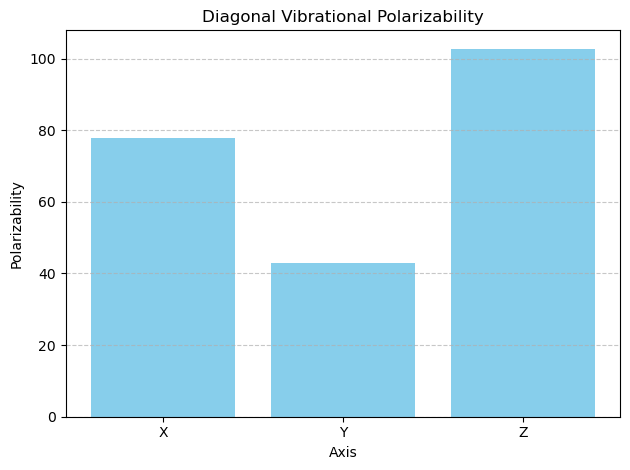

In [2]:
import re
import matplotlib.pyplot as plt

# File path
file_path = '/home/Shabana/6780/Files/OtherFiles/out_put_file.out'

# Extracting the values from the file
with open(file_path, 'r') as file:
    text = file.read()

# Extracting the diagonal vibrational polarizability values
match = re.search(r"Diagonal vibrational polarizability:\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)", text)

if match:
    polarizability_values = [float(match.group(1)), float(match.group(2)), float(match.group(3))]
    print("Extracted polarizability values:", polarizability_values)

    # Plotting
    axes = ['X', 'Y', 'Z']
    plt.bar(axes, polarizability_values, color='skyblue')
    plt.title('Diagonal Vibrational Polarizability')
    plt.xlabel('Axis')
    plt.ylabel('Polarizability')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("Diagonal vibrational polarizability values not found.")


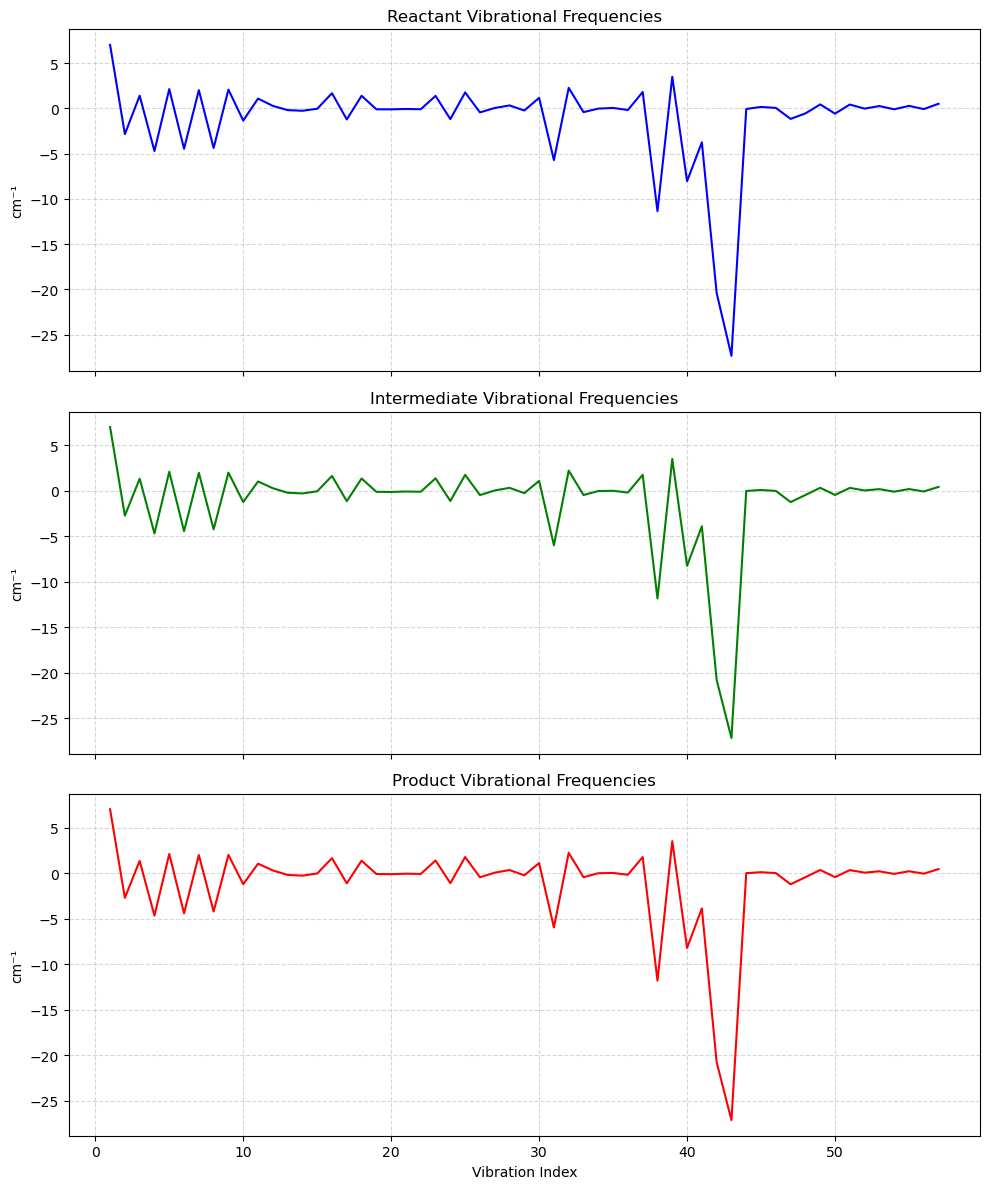

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your file
file_path = '/home/Shabana/6780/Files/OtherFiles/out_put_file.out'

# Regex pattern
pattern = r'^\s*(?P<Index>\d+)\s+(?P<Atom>[A-Za-z]+\(\d+\)|[A-Za-z]+)\s+(?P<au>[-+]?\d*\.\d+|\d+)\s+(?P<MegaHertz>[-+]?\d*\.\d+|\d+)\s+(?P<Gauss>[-+]?\d*\.\d+|\d+)\s+(?P<cm_inv>[-+]?\d*\.\d+|\d+)\s*$'

data = []

# Read and extract matches
with open(file_path, 'r') as file:
    for line in file:
        match = re.match(pattern, line.strip())
        if match:
            data.append(match.groupdict())

# Create DataFrame and convert columns to float
df = pd.DataFrame(data)
df[['Index', 'au', 'MegaHertz', 'Gauss', 'cm_inv']] = df[['Index', 'au', 'MegaHertz', 'Gauss', 'cm_inv']].astype(float)

# Extract blocks by row positions
reactant_df = df.iloc[0:57].reset_index(drop=True)
intermediate_df = df.iloc[57:114].reset_index(drop=True)
product_df = df.iloc[114:171].reset_index(drop=True)

# Set up subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Reactant
axs[0].plot(reactant_df['Index'], reactant_df['cm_inv'],  color='blue')
axs[0].set_title('Reactant Vibrational Frequencies')
axs[0].set_ylabel('cm⁻¹')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Intermediate
axs[1].plot(intermediate_df['Index'], intermediate_df['cm_inv'], color='green')
axs[1].set_title('Intermediate Vibrational Frequencies')
axs[1].set_ylabel('cm⁻¹')
axs[1].grid(True, linestyle='--', alpha=0.5)

# Product
axs[2].plot(product_df['Index'], product_df['cm_inv'],  color='red')
axs[2].set_title('Product Vibrational Frequencies')
axs[2].set_xlabel('Vibration Index')
axs[2].set_ylabel('cm⁻¹')
axs[2].grid(True, linestyle='--', alpha=0.5)

# Layout
plt.tight_layout()
plt.show()


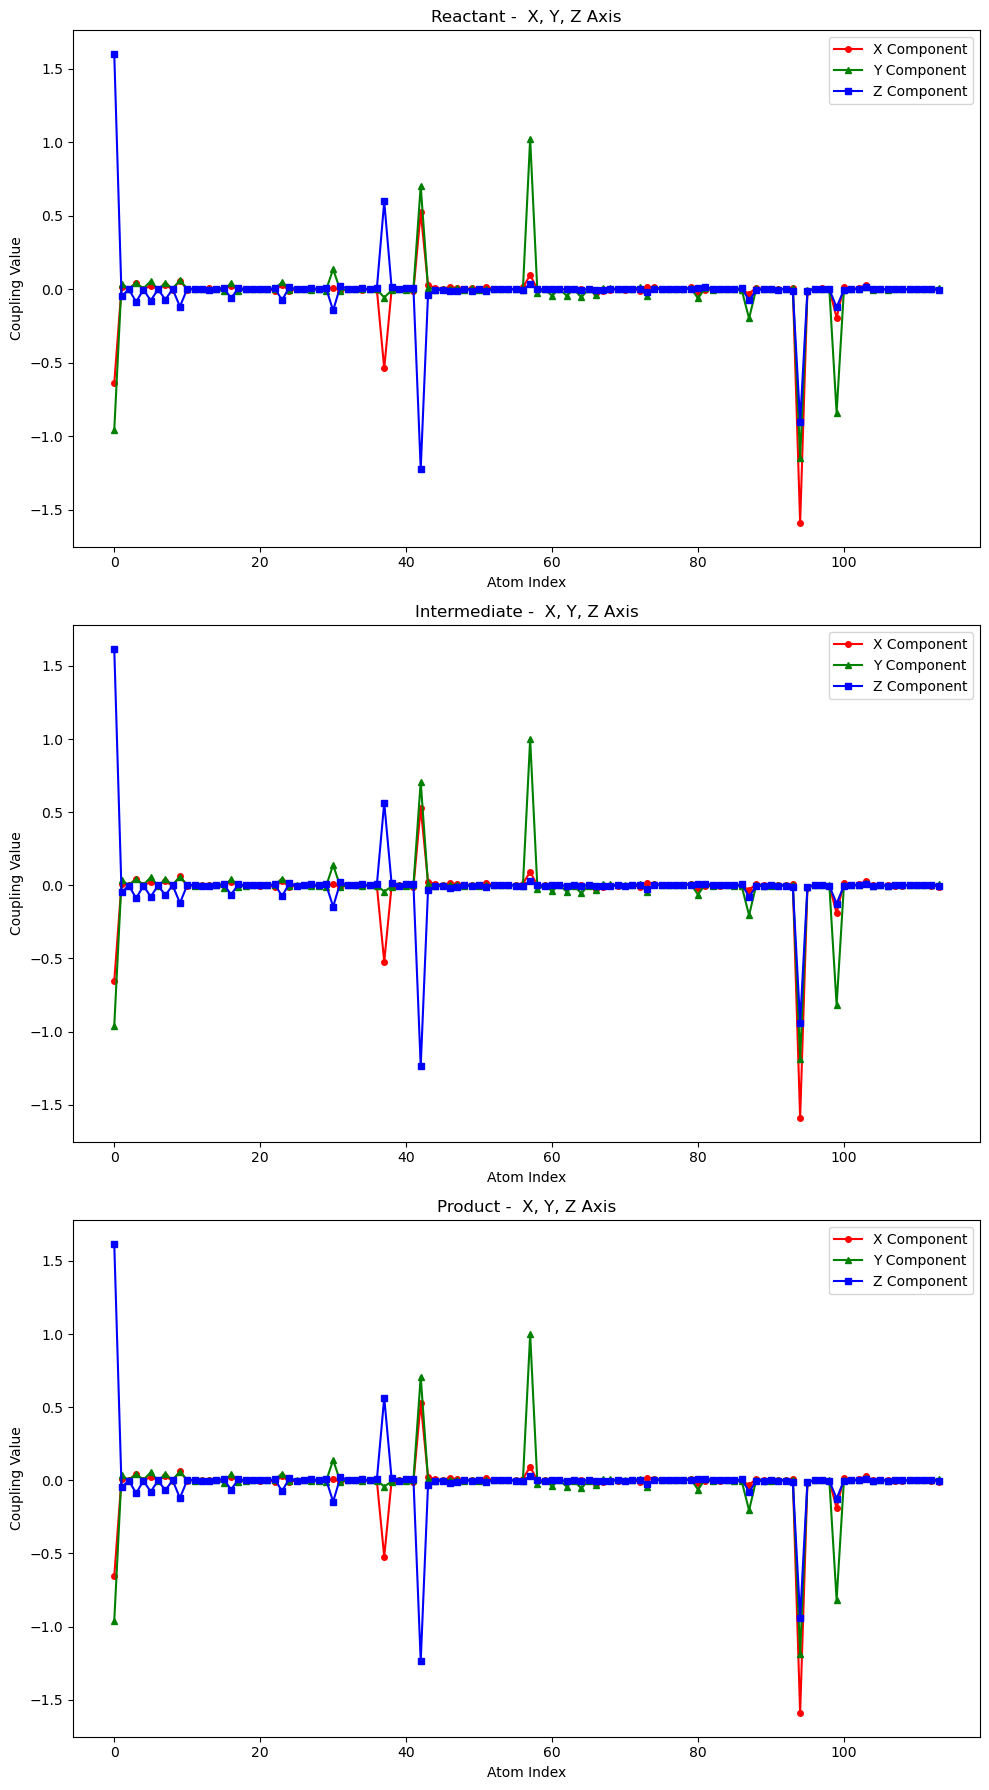

In [7]:
import re
import matplotlib.pyplot as plt

def extract_spin_dipole_couplings(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Match lines like: 1 Atom -0.640507 -0.959919 1.600426
    pattern = r'^\s*(\d+)\s+Atom\s+([-.\d]+)\s+([-.\d]+)\s+([-.\d]+)\s*$'
    matches = re.findall(pattern, content, re.MULTILINE)

    if not matches:
        print("No spin dipole coupling data found.")
        return []

    couplings = []
    for i, match in enumerate(matches):
        atom_index = int(match[0])
        values = list(map(float, match[1:]))
        couplings.append((i + 1, values))  # Assign global unique index

    return couplings

# File path
file_path = '/home/Shabana/6780/Files/OtherFiles/out_put_file.out'
couplings = extract_spin_dipole_couplings(file_path)

# Split into 6 blocks of 57 atoms
block_size = 57
blocks = [couplings[i:i + block_size] for i in range(0, len(couplings), block_size)]

# Combine Blocks
combined_reactant = blocks[0] + blocks[1]  # Step 1 + Step 2
combined_intermediate = blocks[2] + blocks[3]  # Step 3 + Step 4
combined_product = blocks[4] + blocks[5]  # Step 5 + Step 6

# Phase labels
phase_labels = [
    "Reactant",      # Combined Block 1 and 2
    "Intermediate",  # Combined Block 3 and 4
    "Product"        # Combined Block 5 and 6
]

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # 3 rows, 1 column for each phase

# Function to extract components and plot
def plot_combined_data(block, ax, phase_name):
    x = [coupling[1][0] for coupling in block]  # x values (1st component)
    y = [coupling[1][1] for coupling in block]  # y values (2nd component)
    z = [coupling[1][2] for coupling in block]  # z values (3rd component)
    
    # Plot all three components in one plot
    ax.plot(x, label='X Component', color='r', marker='o', linestyle='-', markersize=4)
    ax.plot(y, label='Y Component', color='g', marker='^', linestyle='-', markersize=4)
    ax.plot(z, label='Z Component', color='b', marker='s', linestyle='-', markersize=4)

    ax.set_title(f"{phase_name} -  X, Y, Z Axis")
    ax.set_xlabel('Atom Index')
    ax.set_ylabel('Coupling Value')
    ax.legend()

# Plot for Reactant (Step 1 + Step 2)
plot_combined_data(combined_reactant, axs[0], phase_labels[0])

# Plot for Intermediate (Step 3 + Step 4)
plot_combined_data(combined_intermediate, axs[1], phase_labels[1])

# Plot for Product (Step 5 + Step 6)
plot_combined_data(combined_product, axs[2], phase_labels[2])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
